# Multiclass Classification based on the Cifar10 database

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print('x_train shape: ',x_train.shape)
print('x_train test: ',x_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_train test:  (10000, 32, 32, 3)


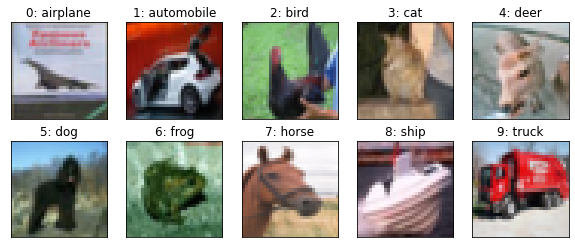

In [4]:
import matplotlib.pyplot as plt
import numpy as np
(_, _), (_, labels) = cifar10.load_data()
idx = [3, 6, 25, 46, 58, 85, 93, 99, 108, 133]
clsmap = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4: 'deer',
    5: 'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}
plt.figure(figsize = (10,4))
for i, (img, y) in enumerate(zip(x_test[idx].reshape(10,32,32,3), labels[idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + ": "+ clsmap[y[0]])
plt.show()

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
#dimensionality of input and latent encoded representations
inpt_dim = (32,32,3)
inpt_img= Input(shape=inpt_dim)
#Convolutional layer
c11 = Conv2D(64,(9,9), strides=(2,2), input_shape = inpt_dim, activation='relu')(inpt_img)

#Pooling and BatchNorm

p12 = MaxPooling2D(pool_size = (2,2))(c11)
bn13 = BatchNormalization()(p12)

# Add a second convolutional layer
c14 = Conv2D(128,(3,3), strides=(1,1), activation='relu')(bn13)
p15 = MaxPooling2D(pool_size = (2,2))(c14)
bn16 = BatchNormalization()(p15)

# Flattening for compatibility
f17 = Flatten()(bn16)
#Dense layers+ Dropout
do18 = Dropout(0.5)(f17)
d19 = Dense(units = 256,activation = 'relu')(do18)
do110 = Dropout(0.2)(d19)
d111 = Dense(units = 64, activation = 'relu')(do110)
do112 = Dropout(0.1)(d111)
output= Dense(units = 10, activation='sigmoid')(do112)

classifier = Model(inpt_img, output)

In [6]:
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
print(classifier.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 12, 12, 64)        15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 6, 6, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0     

In [ ]:
# Fitting the CNN to the images
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, 
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")

Epoch 1/1000
500/500 [==============================] - 32s 62ms/step - loss: 0.3147 - accuracy: 0.2896 - val_loss: 0.2483 - val_accuracy: 0.4047
Epoch 2/1000
500/500 [==============================] - 31s 61ms/step - loss: 0.2332 - accuracy: 0.4590 - val_loss: 0.2394 - val_accuracy: 0.4210
Epoch 3/1000
500/500 [==============================] - 31s 61ms/step - loss: 0.2147 - accuracy: 0.5123 - val_loss: 0.2365 - val_accuracy: 0.4609
Epoch 4/1000
500/500 [==============================] - 30s 61ms/step - loss: 0.2026 - accuracy: 0.5426 - val_loss: 0.2142 - val_accuracy: 0.5162
Epoch 5/1000
500/500 [==============================] - 31s 61ms/step - loss: 0.1931 - accuracy: 0.5694 - val_loss: 0.2285 - val_accuracy: 0.4943
Epoch 6/1000
500/500 [==============================] - 31s 61ms/step - loss: 0.1859 - accuracy: 0.5912 - val_loss: 0.2071 - val_accuracy: 0.5312
Epoch 7/1000
500/500 [==============================] - 31s 61ms/step - loss: 0.1796 - accuracy: 0.6059 - val_loss: 0.2006 -

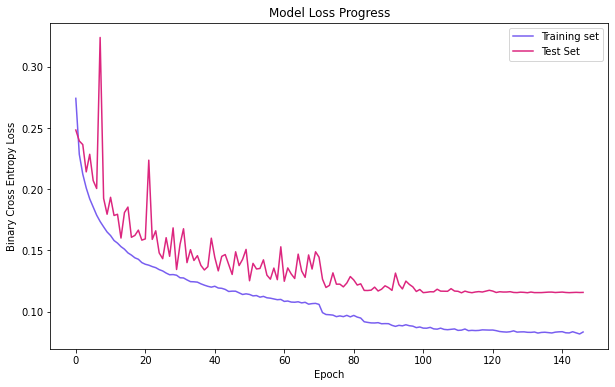

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training set','Test Set'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np
(_, _),(_, labels) = cifar10.load_data()
y_ = labels
y_hat = classifier.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_hat, axis=1), labels=[0,1,2,3,4,5,6,7,8,9]))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)

ber = 1-balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))
print('BER', ber)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.89      0.86      0.88      1000
           2       0.71      0.67      0.69      1000
           3       0.55      0.64      0.59      1000
           4       0.74      0.74      0.74      1000
           5       0.68      0.64      0.66      1000
           6       0.81      0.85      0.83      1000
           7       0.86      0.75      0.80      1000
           8       0.86      0.86      0.86      1000
           9       0.80      0.86      0.83      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

[[809  13  33  22  18   4   6   5  50  40]
 [ 18 858   4   6   5   4   8   3  19  75]
 [ 54   5 674  79  54  46  53  13   9  13]
 [ 13   4  58 635  51 130  53  24  11  21]
 [ 22   2  58  65 744  22  40  32   9   6]
 [  5   5  43 207  38 638 

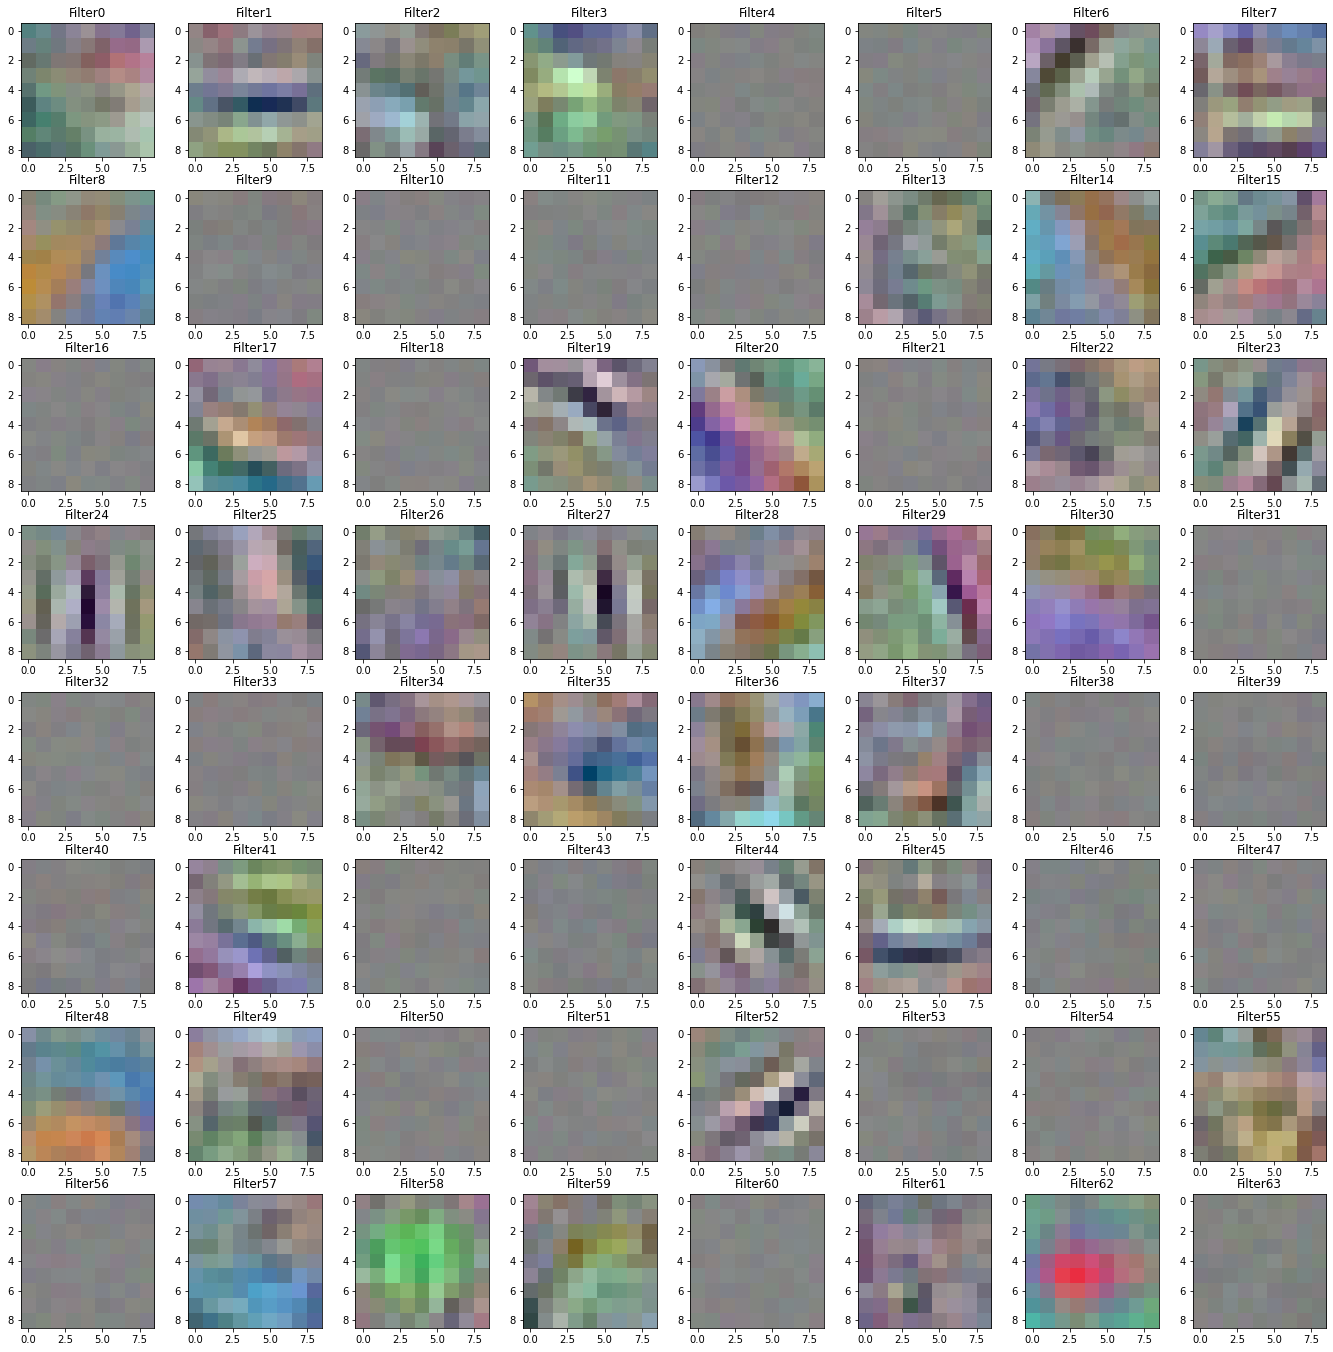

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cnn11 = classifier.layers[1].name # get the name of the 1st convolutional layer
w =classifier.get_layer(name=cnn11).get_weights()[0] # get the filters
wshape = w.shape # save the original shape
# we will scale to [0,1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(w.reshape(-1,1))
w = scaler.transform(w.reshape(-1,1))
w = w.reshape(wshape)
# we will display them 8x8
fig,axs = plt.subplots(8,8,figsize=(24,24))
fig.subplots_adjust(hspace=.25, wspace=.001)
axs = axs.ravel()
for i in range(w.shape[-1]):
  #we will reshape to a 3D (RGB) image shape and display
  h=np.reshape(w[:,:,:,i],(9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter'+str(i))

Gabor filters